## Data Collection & Preparation

* ``Pandas`` for managing the data
* ``NumPy`` for math operations
* ``Sklearn`` for Machine Learning
* ``Seaborn`` for advanced visualization
* ``Matplotlib`` for additional plotting

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [2]:
#read data files

cs = pd.read_csv("charging_sessions.csv")
wba = pd.read_csv("weather_burbank_airport.csv")

In [3]:
#print the first 5 rows of the charging_sessions dataset
cs.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [4]:
#print out the first 5 rows of the weather burbank airport dataset
wba.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [5]:
#print out the columns of charging sessions dataset
cs.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')

In [6]:
#print out the columns of weather burbank airport dataset
wba.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'],
      dtype='object')

In [7]:
#print out the tail of cs dataset to see how many entries there are
cs.tail()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
66449,10087,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47+00:00,2019-07-31 22:00:04+00:00,2019-07-31 20:51:34+00:00,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN


In [8]:
#print out the tail of cs dataset to see how many entries there are
wba.tail()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2021-01-01 07:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


### We will focus on the charging_sessions dataset for a while

In [9]:
#print information about cs dataset
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


We can see that this dataset has an unnamed column that represents the entry number. For better readability, we will rename this column

In [10]:
#rename the unnamed column
cs.rename( columns={'Unnamed: 0':'number'}, inplace=True )

In [11]:
#check if the column was renamed
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


From looking at the count of every column, we can see that the "doneChargingTime" is missing values. The missing values in the "userID" and "userInputs" columns are because the user was not registered, so we can ignore them for now.

**Detecting missing numerical data**

In [12]:
#check if we can spot null-values
cs.isnull()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,False,False,False,False,False,False,False,False,False,False,False,False,False
66446,False,False,False,False,False,False,False,False,False,False,False,False,False
66447,False,False,False,False,False,False,False,False,False,False,False,False,False
66448,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#drop all rows containing null values
cs.dropna(axis=0, inplace=False)

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66444,10082,5d574ad2f9af8b4c10c03651,2019-07-31 14:50:17+00:00,2019-08-01 01:01:18+00:00,2019-07-31 20:29:24+00:00,27.174,1_1_191_784_2019-07-31 14:50:17.037367,1,AG-4F40,1-1-191-784,America/Los_Angeles,448.0,"[{'WhPerMile': 200, 'kWhRequested': 28.0, 'mil..."
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."


In [14]:
#check how many rows are getting dropped
len(cs)-len(cs.dropna())

20442

This number is higher than expected, but because this factors in the null values from userID and userInputs(unregistered users or users with no Input), we want so specifically look for missing values in the "doneChargingTime"-column

In [15]:
len(cs)-len(cs.dropna(subset = ['doneChargingTime']))

4088

This number tells us that there are 4088 sessions with no timestamp for when the EV got done charging, meaning that it didn't fully charge. Let's look at this data.

In [16]:
#display records with 'doneCharging = Null
cs_notdone = cs[cs['doneChargingTime'].isnull()]
cs_notdone

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
3756,3756,5ea3848df9af8b428bf97225,2020-04-08 16:36:53+00:00,2020-04-09 03:43:29+00:00,NaN,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,America/Los_Angeles,507.0,"[{'WhPerMile': 250, 'kWhRequested': 75.0, 'mil..."
3757,3757,5ea4d60df9af8b46573f1ee7,2020-04-09 13:23:52+00:00,2020-04-09 17:59:02+00:00,NaN,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
3758,3758,5ea4d60df9af8b46573f1ee8,2020-04-09 13:40:03+00:00,2020-04-09 21:43:22+00:00,NaN,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,America/Los_Angeles,5065.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
3759,3759,5ea4d60df9af8b46573f1ee9,2020-04-09 14:01:53+00:00,2020-04-09 16:33:40+00:00,NaN,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
3760,3760,5ea4d60df9af8b46573f1eea,2020-04-09 15:01:06+00:00,2020-04-09 23:38:08+00:00,NaN,5.797,1_1_193_820_2020-04-09 15:01:06.343454,1,AG-1F04,1-1-193-820,America/Los_Angeles,466.0,"[{'WhPerMile': 300, 'kWhRequested': 6.0, 'mile..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60411,4049,5cb3d2a8f9af8b4551261e75,2019-03-30 00:32:10+00:00,2019-03-30 02:23:14+00:00,NaN,11.148,1_1_193_829_2019-03-30 00:32:10.128651,1,AG-1F03,1-1-193-829,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
61097,4735,5cc8e891f9af8b45d975b819,2019-04-14 16:19:12+00:00,2019-04-14 20:38:39+00:00,NaN,11.678,1_1_193_816_2019-04-14 16:19:11.864262,1,AG-1F05,1-1-193-816,America/Los_Angeles,364.0,"[{'WhPerMile': 400, 'kWhRequested': 56.0, 'mil..."
61103,4741,5cca3a54f9af8b49aaa4cbac,2019-04-15 13:00:59+00:00,2019-04-15 13:55:25+00:00,NaN,3.343,1_1_193_819_2019-04-15 13:00:58.722284,1,AG-1F06,1-1-193-819,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
61117,4755,5cca3a54f9af8b49aaa4cbba,2019-04-15 13:52:45+00:00,2019-04-15 14:47:01+00:00,NaN,4.558,1_1_179_800_2019-04-15 13:52:44.693153,1,AG-3F32,1-1-179-800,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 12.0, 'mil..."


### Dealing with missing values

When dealing with missing values, we can either **eliminate** them from the dataset or **impute** the null values with estimates. Because the missing data points are timestamps, it's hard them because they simply do not exist. The EV never got done charging, so estimating a value doesn't make any sense. And because our job is to optimize utilization, looking at data points where the EV never fully charged(and thus didn't stay plugged in without charging and taking up charging space) is not adequate. That is why we will drop these data points.

In [17]:
#we take every row where "doneChargingTime" is not null into our new dataset cs_clean
cs_clean = cs[cs['doneChargingTime'].notna()]

In [18]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   siteID            62362 non-null  int64  
 8   spaceID           62362 non-null  object 
 9   stationID         62362 non-null  object 
 10  timezone          62362 non-null  object 
 11  userID            46008 non-null  float64
 12  userInputs        46008 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.7+ MB


The data is now clean and we can work with it!

# Data Wrangling & Feature Engineering

To better understand what typical charging sessions look like, we will do a cluster analysis. But before that, we need to do some more Data Wrangling and Feature Engineering.

Lets do some more data wrangling and Feature Engineering. We already identified that site1 is the private site and site2 is the public site.

In [19]:
#From Descriptive Analytics

dummy_var1 = pd.get_dummies(cs_clean["siteID"])
dummy_var1.head()
dummy_var1.rename(columns={1:'private-site', 2:'public-site'}, inplace=True)
dummy_var1.head()
cs_clean = pd.concat([cs_clean, dummy_var1], axis=1)
cs_clean.drop("siteID", axis = 1, inplace=True)

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False


In [20]:
cs_clean.dtypes

number                int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
private-site           bool
public-site            bool
dtype: object

To be able to work with Time data, we first have to convert all time data to datetime64. Then, we have to convert the times to match the Los Angeles Timezone.

In [21]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   spaceID           62362 non-null  object 
 8   stationID         62362 non-null  object 
 9   timezone          62362 non-null  object 
 10  userID            46008 non-null  float64
 11  userInputs        46008 non-null  object 
 12  private-site      62362 non-null  bool   
 13  public-site       62362 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(9)
memory usage: 6.3+ MB


We see that datetimes are for UTC(UTC+0) instead of UTC-8, so we have to correct that

In [22]:
cs_clean['connectionTime'] = pd.to_datetime(cs_clean['connectionTime']) - pd.Timedelta(hours=8)
cs_clean['disconnectTime'] = pd.to_datetime(cs_clean['disconnectTime']) - pd.Timedelta(hours=8)
cs_clean['doneChargingTime'] = pd.to_datetime(cs_clean['doneChargingTime']) - pd.Timedelta(hours=8)
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   number            62362 non-null  int64              
 1   id                62362 non-null  object             
 2   connectionTime    62362 non-null  datetime64[ns, UTC]
 3   disconnectTime    62362 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered      62362 non-null  float64            
 6   sessionID         62362 non-null  object             
 7   spaceID           62362 non-null  object             
 8   stationID         62362 non-null  object             
 9   timezone          62362 non-null  object             
 10  userID            46008 non-null  float64            
 11  userInputs        46008 non-null  object             
 12  private-site      62362 non-null  bool               
 13  public

In [23]:
cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False


We want to see what day of the week the session took place in, so lets compute a new column "dayOfWeek".

In [24]:
cs_clean['dayOfWeek'] = cs_clean['connectionTime'].dt.day_name()

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Thursday
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Thursday
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Thursday


We now want to compute some more columns that might give us a better understanding of the data. Lets start with chargeduration. Chargeduration tells us for how long the session went on.

In [25]:
cs_clean['chargeDuration'] = cs_clean['disconnectTime'] - cs_clean['connectionTime']
cs_clean['chargeDurationHours'] = (cs_clean['chargeDuration'] / pd.Timedelta(minutes=1)).astype(float)/60

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Thursday,0 days 06:02:21,6.039167
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Thursday,0 days 09:01:31,9.025278
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 10:42:47,10.713056
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 02:38:41,2.644722
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Thursday,0 days 08:08:39,8.144167


We want another colums that displays the excess utilization(idle) time, that the car utilized the station when it was already fully loaded.

In [26]:
cs_clean['excessTime'] = cs_clean['disconnectTime'] - cs_clean['doneChargingTime']
cs_clean['excessDurationHours'] = (cs_clean['excessTime'] / pd.Timedelta(minutes=1)).astype(float)/60

cs_clean

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours,excessTime,excessDurationHours
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Thursday,0 days 06:02:21,6.039167,0 days 01:39:40,1.661111
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Thursday,0 days 09:01:31,9.025278,0 days 02:20:16,2.337778
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 10:42:47,10.713056,0 days 08:04:16,8.071111
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 02:38:41,2.644722,0 days 01:19:54,1.331667
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Thursday,0 days 08:08:39,8.144167,0 days 03:51:10,3.852778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 10:08:04+00:00,2019-07-31 15:29:18+00:00,2019-07-31 15:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil...",True,False,Wednesday,0 days 05:21:14,5.353889,-1 days +23:59:00,-0.016667
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 10:40:41+00:00,2019-07-31 16:59:42+00:00,2019-07-31 13:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil...",True,False,Wednesday,0 days 06:19:01,6.316944,0 days 03:15:19,3.255278
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 11:04:40+00:00,2019-07-31 14:44:22+00:00,2019-07-31 14:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi...",True,False,Wednesday,0 days 03:39:42,3.661667,-1 days +23:59:01,-0.016389
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 11:19:47+00:00,2019-07-31 16:34:51+00:00,2019-07-31 13:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil...",True,False,Wednesday,0 days 05:15:04,5.251111,0 days 03:09:21,3.155833


Lets make a column that displays the **efficiency** of the session. We calculate the efficiency of the session by dividing the excessTime by the chargeDuration. A 100% efficiency means that the EV disconnected right when it was fully loaded(0 idle time).

In [27]:
cs_clean['sessionEfficiency'] = (1-cs_clean['excessTime'] / cs_clean['chargeDuration'])*100

cs_clean

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours,excessTime,excessDurationHours,sessionEfficiency
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Thursday,0 days 06:02:21,6.039167,0 days 01:39:40,1.661111,72.494365
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Thursday,0 days 09:01:31,9.025278,0 days 02:20:16,2.337778,74.097442
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 10:42:47,10.713056,0 days 08:04:16,8.071111,24.660980
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 02:38:41,2.644722,0 days 01:19:54,1.331667,49.648146
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Thursday,0 days 08:08:39,8.144167,0 days 03:51:10,3.852778,52.692793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 10:08:04+00:00,2019-07-31 15:29:18+00:00,2019-07-31 15:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil...",True,False,Wednesday,0 days 05:21:14,5.353889,-1 days +23:59:00,-0.016667,100.311300
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 10:40:41+00:00,2019-07-31 16:59:42+00:00,2019-07-31 13:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil...",True,False,Wednesday,0 days 06:19:01,6.316944,0 days 03:15:19,3.255278,48.467526
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 11:04:40+00:00,2019-07-31 14:44:22+00:00,2019-07-31 14:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi...",True,False,Wednesday,0 days 03:39:42,3.661667,-1 days +23:59:01,-0.016389,100.447580
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 11:19:47+00:00,2019-07-31 16:34:51+00:00,2019-07-31 13:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil...",True,False,Wednesday,0 days 05:15:04,5.251111,0 days 03:09:21,3.155833,39.901608


As we can see below, there are 27 entries in the data set where the doneCharginTime is BEFORE the connectionTime. Since that does not make sense, we'll remove them from the data.

In [28]:
out_of_range_entries = cs_clean[cs_clean['connectionTime'] > cs_clean['doneChargingTime']]
len(out_of_range_entries)

27

In [29]:
cs_clean = cs_clean[cs_clean['connectionTime'] < cs_clean['doneChargingTime']]

We now want to see when the session took place throughout the day. We can achieve this by creating new columns named connectionHour and disconnectHour. These columns show the decimals of the hours when a session started and when it ended.

In [30]:
cs_clean['connectionHour'] = cs_clean['connectionTime'].dt.hour + cs_clean['connectionTime'].dt.minute / 60
cs_clean['disconnectHour'] = cs_clean['disconnectTime'].dt.hour + cs_clean['disconnectTime'].dt.minute / 60

C:\Users\sterl\AppData\Local\Temp\ipykernel_8576\1603379457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_clean['connectionHour'] = cs_clean['connectionTime'].dt.hour + cs_clean['connectionTime'].dt.minute / 60
C:\Users\sterl\AppData\Local\Temp\ipykernel_8576\1603379457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_clean['disconnectHour'] = cs_clean['disconnectTime'].dt.hour + cs_clean['disconnectTime'].dt.minute / 60


Now lets create a subset of our dataframe containing the most important columns that we will use for our Clustering analysis. We will also create different dataframes for every site.

In [31]:
csa = cs_clean[['dayOfWeek', 'private-site','public-site', 'sessionEfficiency', 'connectionTime', 'chargeDurationHours']]

In [32]:
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

cs = pd.DataFrame()
cs['dayOfWeek'] = csa['dayOfWeek'].map(day_mapping)
cs['timeOfDay'] = csa['connectionTime'].dt.time.apply(lambda x: (x.hour + x.minute / 60 + x.second / 3600) / 24)
cs['timeOfWeek'] = cs['timeOfDay'] + cs['dayOfWeek']
cs = cs.drop(['timeOfDay', 'dayOfWeek'],axis=1)
cs['private-site'] = csa['private-site']
cs['public-site'] = csa['public-site']
cs['chargeDurationHours'] = csa['chargeDurationHours']
cs['sessionEfficiency'] = csa['sessionEfficiency']
cs['isWeekday'] = cs['timeOfWeek'] < 5

cs.head()

,timeOfWeek,private-site,public-site,chargeDurationHours,sessionEfficiency,isWeekday
0,3.214514,True,False,6.039167,72.494365,True
1,3.233912,True,False,9.025278,74.097442,True
2,3.247627,True,False,10.713056,24.660980,True
3,3.249977,True,False,2.644722,49.648146,True
4,3.250012,True,False,8.144167,52.692793,True


In [33]:
cs_pr = cs[cs['private-site'] == True]
cs_pu = cs[cs['public-site'] == True]

cs = cs[['timeOfWeek', 'sessionEfficiency', 'isWeekday']]
cs_pr = cs_pr[['timeOfWeek', 'sessionEfficiency', 'isWeekday']]
cs_pu = cs_pu[['timeOfWeek', 'sessionEfficiency', 'isWeekday']]

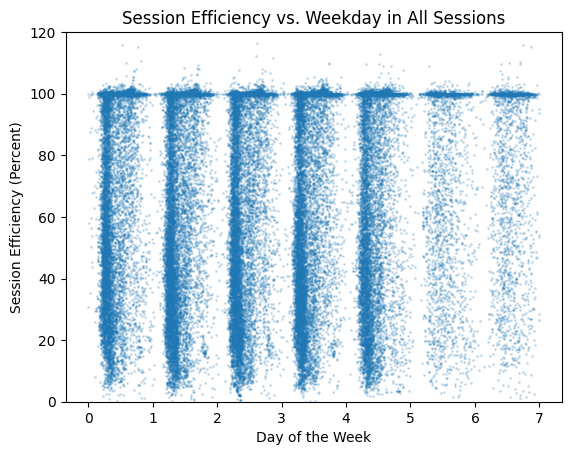

In [34]:
plt.scatter(cs['timeOfWeek'], cs['sessionEfficiency'], s=1 , alpha=0.2)
plt.xlabel('Day of the Week')
plt.ylabel('Session Efficiency (Percent)')
plt.title('Session Efficiency vs. Weekday in All Sessions')
plt.ylim(0,120)
plt.show()

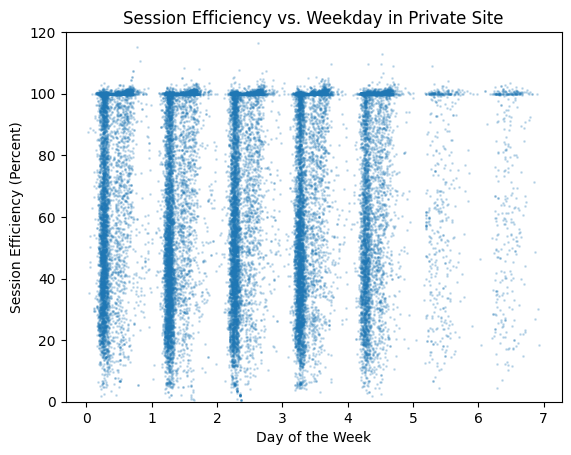

In [35]:
plt.scatter(cs_pr['timeOfWeek'], cs_pr['sessionEfficiency'], s=1 , alpha=0.2)
plt.xlabel('Day of the Week')
plt.ylabel('Session Efficiency (Percent)')
plt.title('Session Efficiency vs. Weekday in Private Site')
plt.ylim(0,120)
plt.show()

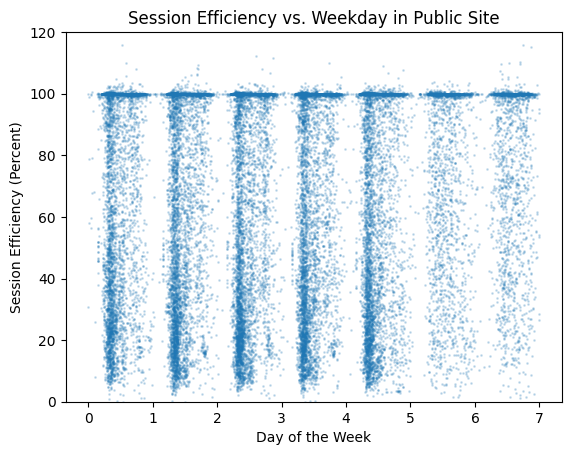

In [36]:
plt.scatter(cs_pu['timeOfWeek'], cs_pu['sessionEfficiency'], s=1 , alpha=0.2)
plt.xlabel('Day of the Week')
plt.ylabel('Session Efficiency (Percent)')
plt.title('Session Efficiency vs. Weekday in Public Site')
plt.ylim(0,120)
plt.show()

# Partitioning & Clustering

First we normalize our data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cs)
cs_scaled = scaler.transform(cs)
cs_scaled_df = pd.DataFrame(cs, columns=cs.columns, index=cs.index)
cs_scaled_df.head()

,timeOfWeek,sessionEfficiency,isWeekday
0,3.214514,72.494365,True
1,3.233912,74.097442,True
2,3.247627,24.660980,True
3,3.249977,49.648146,True
4,3.250012,52.692793,True


In [38]:
charging_scaled = cs_scaled_df

## K-means Clustering

To get a rough idea on how many clusters to expect, we will plot residual loss for different number of clusters, then find the'elbow' and select the corresponding number of clusters.

In [39]:
from sklearn.cluster import KMeans

k_max = 20  # We might have lots of data points, but more than 20 clusters and thus more than 20 archetypes of session would be way to many.

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(cs_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

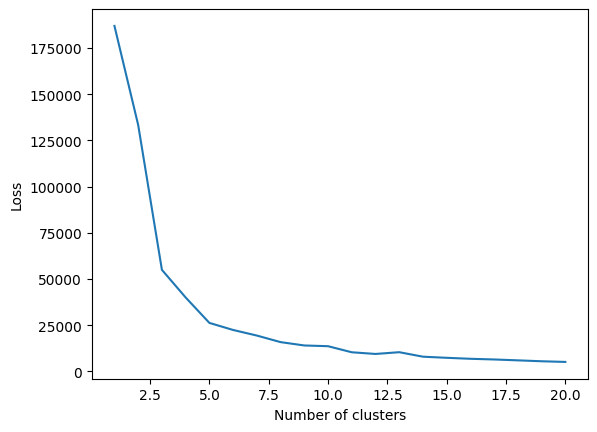

In [40]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 10.0)

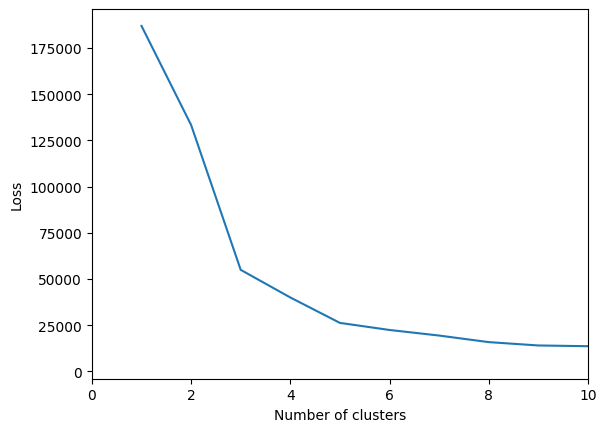

In [41]:
#Zoom

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,10])

We can see the "elbow" roughly at 3-5 which seems to be the optimal amount.

In [42]:
# refit algorithm
three_means = KMeans(n_clusters=3, n_init='auto')
three_means.fit(cs_scaled)

# match records to clusters by calling predict
three_means.predict(cs_scaled)

array([2, 2, 0, ..., 2, 0, 0])

In [43]:
charging_scaled.head()

,timeOfWeek,sessionEfficiency,isWeekday
0,3.214514,72.494365,True
1,3.233912,74.097442,True
2,3.247627,24.660980,True
3,3.249977,49.648146,True
4,3.250012,52.692793,True


<Axes: xlabel='timeOfWeek', ylabel='sessionEfficiency'>

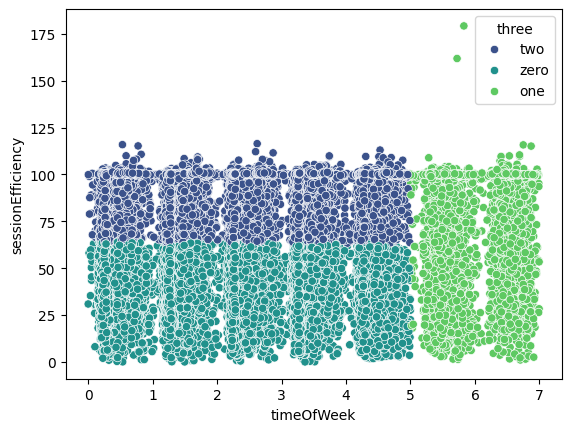

In [44]:
numbers = ["zero", "one", "two", "three", "four"]

charging_scaled["three"] = three_means.predict(cs_scaled)
charging_scaled["three"] = charging_scaled["three"].apply(lambda x: numbers[x])
xlim_values = (0, 100)
sns.scatterplot(x='timeOfWeek', y='sessionEfficiency', hue='three', data=charging_scaled, palette='viridis')

<Axes: xlabel='timeOfWeek', ylabel='sessionEfficiency'>

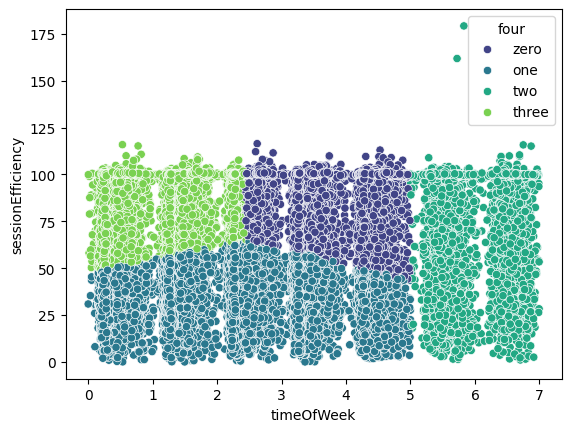

In [45]:
four_means = KMeans(n_clusters=4, n_init='auto')
four_means.fit(cs_scaled)
charging_scaled["four"] = four_means.predict(cs_scaled)
charging_scaled["four"] = charging_scaled["four"].apply(lambda x: numbers[x])
sns.scatterplot(x='timeOfWeek', y='sessionEfficiency', hue='four', data=charging_scaled, palette='viridis')

<Axes: xlabel='timeOfWeek', ylabel='sessionEfficiency'>

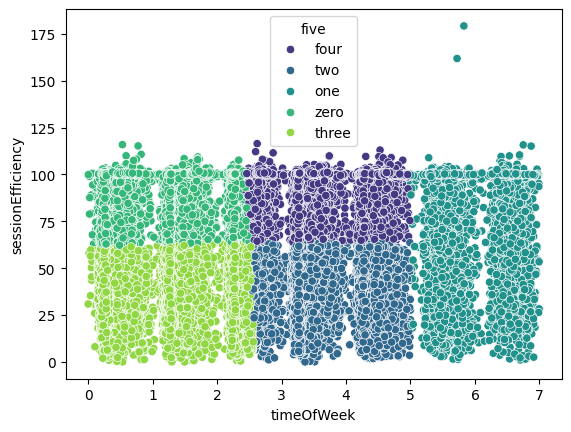

In [46]:
four_means = KMeans(n_clusters=5, n_init='auto')
four_means.fit(cs_scaled)
charging_scaled["five"] = four_means.predict(cs_scaled)
charging_scaled["five"] = charging_scaled["five"].apply(lambda x: numbers[x])
sns.scatterplot(x='timeOfWeek', y='sessionEfficiency', hue='five', data=charging_scaled, palette='viridis')

We see that three clusters group our data pretty well. Both four and five clusters lead to a cut in the middle of the week that does not add a lot of value.

The clusters zero and two are the efficient and unefficient sessions on weekdays, the cluster one is weekend sessions.

Let's have a look at the cluster distribution and efficiency average.

In [47]:
cluster_centers = three_means.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

cluster_sizes = charging_scaled["three"].value_counts()
print("\nNumber of Datapoints in Each Cluster:")
print(cluster_sizes)

Cluster Centers:
[[-0.19667488 -0.94362513  0.30209933]
 [ 2.0004146   0.34194377 -3.31016953]
 [-0.16883792  0.85656535  0.30209933]]

Number of Datapoints in Each Cluster:
three
two     28948
zero    28172
one      5213
Name: count, dtype: int64


In [48]:
x = 5213 / (5213 + 28929+28191)
print(x)

0.08363146326985706


We can see that cluster zero and two are quite evenly distributed. The weekend cluster only contains 5,213 sessions, which is only 8,36% of the total sessions. This emphasizes that there are a lot more charging sessions during the week, presumably due to work drives.

In [49]:
#charging_scaled = charging_scaled.drop(['four'], axis=1)

In [50]:
charging_scaled.head()

,timeOfWeek,sessionEfficiency,isWeekday,three,four,five
0,3.214514,72.494365,True,two,zero,four
1,3.233912,74.097442,True,two,zero,four
2,3.247627,24.660980,True,zero,one,two
3,3.249977,49.648146,True,zero,one,two
4,3.250012,52.692793,True,zero,one,two


In [51]:
average_efficiency_by_cluster = charging_scaled.groupby('three')['sessionEfficiency'].mean()
average_efficiency_by_cluster

three
one     75.506781
two     91.625828
zero    35.249762
Name: sessionEfficiency, dtype: float64

Here we can see the clusters' average efficiency. As expected, the average efficiency of cluster two is the highest. Cluster one is the weekend cluster and therefore somewhere in-between. Cluster zero shows the inefficient sessions on weekdays which can be reoccurring due to work. We can label the clusters as follows:

Cluster zero: **Inefficient sessions during the week**

Cluster one: **Weekend sessions**

Cluster two: **Efficient sessions during the week**